In [1]:
from Vicsek_modified import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
L = 31.6

rho = 1
r = 2
N = int(rho*L**2 )

 


v_0 = 0.1
iterations = 10000
eta = 0.5
alpha=1
beta=1

pos,theta,s=Vicsek_modified(v_0,eta,r, N,L,iterations,alpha,beta)


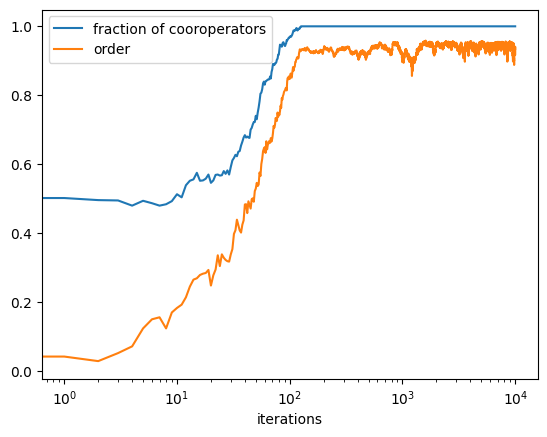

In [12]:
%matplotlib inline
def order(angle_list):
    return np.sqrt(sum(np.sin(angle_list))**2+sum(np.cos(angle_list))**2 )/len(angle_list)
o=[order(t) for t in theta]
C=[sum(t)/len(t) for t in s]
plt.plot(C,label='fraction of cooroperators')
plt.plot(o,label='order')
plt.xscale('log')
plt.xlabel('iterations')
plt.legend()
plt.show()

In [6]:
plt.plot(o,C)

Text(0.5, 0, 'iterations')

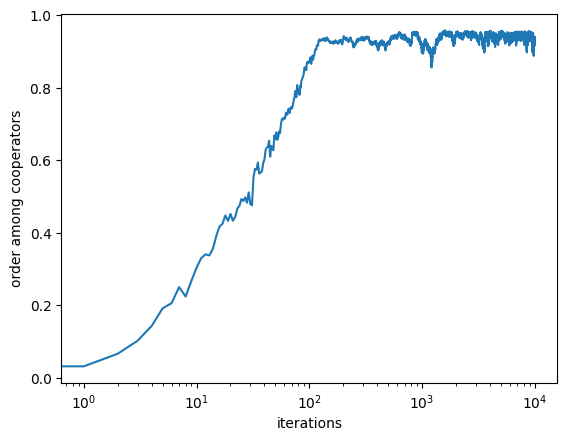

In [19]:
%matplotlib inline

#Trying only plot order of cooperators
#coorepator_indexes=[[ k if s[iteration][k]==1 for k in range(N)] for iteration in range(iterations)]
thetha_cooperators=[ [theta[iteration][k]  for k in range(N)  if s[iteration][k]==1 ] for iteration in range(iterations) ]
o_c=[order(t) for t in thetha_cooperators]

plt.plot(o_c)
plt.xscale('log')
plt.ylabel('order among cooperators')
plt.xlabel('iterations')


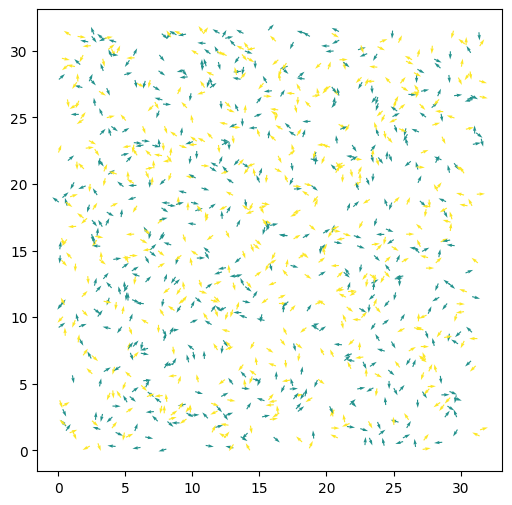

In [5]:
fig, ax= plt.subplots(figsize=(6,6))
i1=0
qv = ax.quiver(pos[i1][:,0], pos[i1][:,1], np.cos(theta[i1]), np.sin(theta[i1]), 100*s[i1], clim=[-np.pi, np.pi])
plt.show()

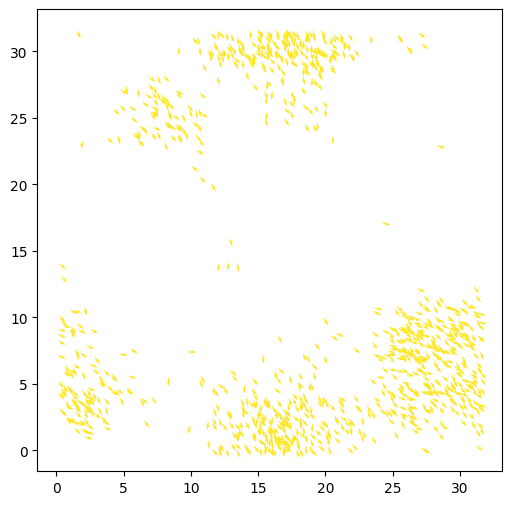

In [6]:
fig, ax= plt.subplots(figsize=(6,6))
i1=-1
qv = ax.quiver(pos[i1][:,0], pos[i1][:,1], np.cos(theta[i1]), np.sin(theta[i1]), 100*s[i1], clim=[-np.pi, np.pi])
plt.show()

In [4]:
%matplotlib qt

fig, ax= plt.subplots(figsize=(6,6))
    

qv=ax.quiver(pos[0][:,0], pos[0][:,1], np.cos(theta[0]), np.sin(theta[0]), s[0], clim=[0, 1])
#qv=ax.quiver(pos[0][:,0], pos[0][:,1], np.cos(theta[0]), np.sin(theta[0]),)
#qv=ax.scatter(pos[0][:,0], pos[0][:,1])
# Animation function
def animate(i):
    

    qv.set_offsets(pos[i])
    qv.set_UVC(np.cos(theta[i]), np.sin(theta[i]),s[i])
    #qv.set_UVC(np.cos(theta[i]), np.sin(theta[i]))
    
    
    return qv,

anim = FuncAnimation(fig,animate,np.arange(1, 200),interval=1, blit=True)
plt.show()


In [5]:
anim.save("r=2_video.gif")